In [1]:
import sys 
sys.path.append('/pl/active/banich/studies/Relevantstudies/abcd/env/lib/python3.7/site-packages')
sys.path.append('/pl/active/banich/studies/Clearvale/jake_scripts/Amy_flywheel_scripts/')

import numpy as np
import pandas as pd

from scipy.stats import spearmanr, pearsonr
from scipy import stats
from scipy.spatial import distance
import math
import networkx as nx
import numpy as np
from igraph import *
from scipy.stats import zscore

In [3]:
vn = pd.read_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/dispersion_data/vn_derosa_task_network_dispersion_lesioned_new_all.csv')
smn = pd.read_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/dispersion_data/smn_derosa_task_network_dispersion_lesioned_new_all.csv')
fpcn  = pd.read_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/dispersion_data/fpcn_derosa_task_network_dispersion_lesioned_new_all.csv')
dmn = pd.read_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/dispersion_data/dmn_derosa_task_network_dispersion_lesioned_new_all.csv')




In [24]:
import pandas as pd

# Assuming vn, smn, fpcn, and dmn are predefined DataFrames

# Start by merging vn and smn on 'SubID' and 'Missing' columns
merged_df = pd.merge(vn, smn, on=['SubID', 'missing'], how='outer')

# Merge the result with fpcn
merged_df = pd.merge(merged_df, fpcn, on=['SubID', 'missing'], how='outer')

# Finally, merge the result with dmn
merged_df = pd.merge(merged_df, dmn, on=['SubID', 'missing'], how='outer').sort_values(['SubID','missing'])

merged_df

,SubID,missing,main_vn_dispersion_md,replace_vn_dispersion_md,suppress_vn_dispersion_md,clear_vn_dispersion_md,main_smn_dispersion_md,replace_smn_dispersion_md,suppress_smn_dispersion_md,clear_smn_dispersion_md,main_fpcn_dispersion_md,replace_fpcn_dispersion_md,suppress_fpcn_dispersion_md,clear_fpcn_dispersion_md,main_dmn_dispersion_md,replace_dmn_dispersion_md,suppress_dmn_dispersion_md,clear_dmn_dispersion_md
0,1,29,10.932152,10.353105,10.689358,10.622626,7.569645,7.690577,7.693586,7.681415,16.404032,15.345778,16.073492,16.319338,9.390391,9.264866,9.315095,9.220713
1,1,30,10.932152,10.353105,10.689358,10.622626,7.569645,7.690577,7.693586,7.681415,16.404032,15.345778,16.073492,16.319338,11.071304,11.003342,10.467431,10.901959
2,1,31,10.932152,10.353105,10.689358,10.622626,9.333705,9.090597,9.332409,9.126717,16.404032,15.345778,16.073492,16.319338,11.071304,11.003342,10.467431,10.901959
3,1,32,12.574343,11.632324,12.226846,12.438657,9.333705,9.090597,9.332409,9.126717,16.404032,15.345778,16.073492,16.319338,11.071304,11.003342,10.467431,10.901959
4,1,33,12.574343,11.632324,12.226846,12.438657,9.333705,9.090597,9.332409,9.126717,17.642113,16.818647,17.550019,17.563781,11.071304,11.003342,10.467431,10.901959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17869,84,355,141.434678,137.046685,131.444575,131.803627,97.143019,100.256029,101.248983,100.836808,153.643014,155.131414,150.842165,153.800691,141.802770,139.094410,135.267440,141.576946
17870,84,356,142.910861,138.421822,132.791423,133.147442,97.143019,100.256029,101.248983,100.836808,153.643014,155.131414,150.842165,153.800691,141.802770,139.094410,135.267440,141.576946
17871,84,357,144.386048,139.755090,134.157980,134.531708,97.143019,100.256029,101.248983,100.836808,153.643014,155.131414,150.842165,153.800691,141.802770,139.094410,135.267440,141.576946
17872,84,358,144.386048,139.755090,134.157980,134.531708,97.143019,100.256029,101.248983,100.836808,155.369334,156.783001,152.618881,155.494774,141.802770,139.094410,135.267440,141.576946


In [3]:
eigcent = pd.read_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/dispersion_data/derosa_task_network_eigcent.csv')
disp = pd.read_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/dispersion_data/derosa_task_network_dispersion.csv')

z_data = pd.read_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/analysis/ClearMem_Z_Average.csv')
z_data = z_data[['SubID', 'z_ave', 'PSWQ_total', 'WBSI_total', 'RRS_total', 'RRS_depression', 'RRS_brooding', 'RRS_reflection']]
z_data = z_data.dropna()

eigcent = pd.read_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/dispersion_data/derosa_task_network_eigcent.csv')
disp = pd.read_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/dispersion_data/derosa_task_network_dispersion.csv')

z_data = pd.read_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/analysis/ClearMem_Z_Average.csv')
z_data = z_data[['SubID', 'z_ave', 'PSWQ_total', 'WBSI_total', 'RRS_total', 'RRS_depression', 'RRS_brooding', 'RRS_reflection']]
z_data = z_data.dropna()

z_data['b_z_ave'] = (zscore(z_data['PSWQ_total']) + zscore(z_data['WBSI_total']) + zscore(z_data['RRS_brooding']))/3
z_data['brd_z_ave'] = (zscore(z_data['PSWQ_total']) + zscore(z_data['WBSI_total']) + zscore(z_data['RRS_brooding']) + zscore(z_data['RRS_reflection']) + zscore(z_data['RRS_depression']))/5

sub_data = pd.merge(z_data, eigcent, on='SubID')
sub_data = pd.merge(sub_data, disp, on='SubID')

sub_data.to_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/analysis/sub_eig_eig_z_data.csv', index=False)

In [11]:
#sub_data.columns
sub_data.columns

Index(['SubID', 'z_ave', 'PSWQ_total', 'WBSI_total', 'RRS_total',
       'RRS_depression', 'RRS_brooding', 'RRS_reflection', 'b_z_ave',
       'brd_z_ave', 'maintain_vn_eigenvector_centrality',
       'maintain_smn_eigenvector_centrality',
       'maintain_fpcn_eigenvector_centrality',
       'maintain_dmn_eigenvector_centrality',
       'replace_vn_eigenvector_centrality',
       'replace_smn_eigenvector_centrality',
       'replace_fpcn_eigenvector_centrality',
       'replace_dmn_eigenvector_centrality',
       'suppress_vn_eigenvector_centrality',
       'suppress_smn_eigenvector_centrality',
       'suppress_fpcn_eigenvector_centrality',
       'suppress_dmn_eigenvector_centrality',
       'clear_vn_eigenvector_centrality', 'clear_smn_eigenvector_centrality',
       'clear_fpcn_eigenvector_centrality', 'clear_dmn_eigenvector_centrality',
       'main_vn_dispersion_md', 'main_smn_dispersion_md',
       'main_fpcn_dispersion_md', 'main_dmn_dispersion_md',
       'replace_vn_dispersi

In [5]:
import numpy as np
from scipy import stats

# Perform the Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(sub_data.filter(regex='eig'))

print(f"Shapiro-Wilk Test statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

# Interpretation of the result
if shapiro_test.pvalue > 0.05:
    print("The data is likely normal (fail to reject H0)")
else:
    print("The data is likely not normal (reject H0)")


Shapiro-Wilk Test statistic: 0.7017346620559692, p-value: 9.589250713204428e-35
The data is likely not normal (reject H0)


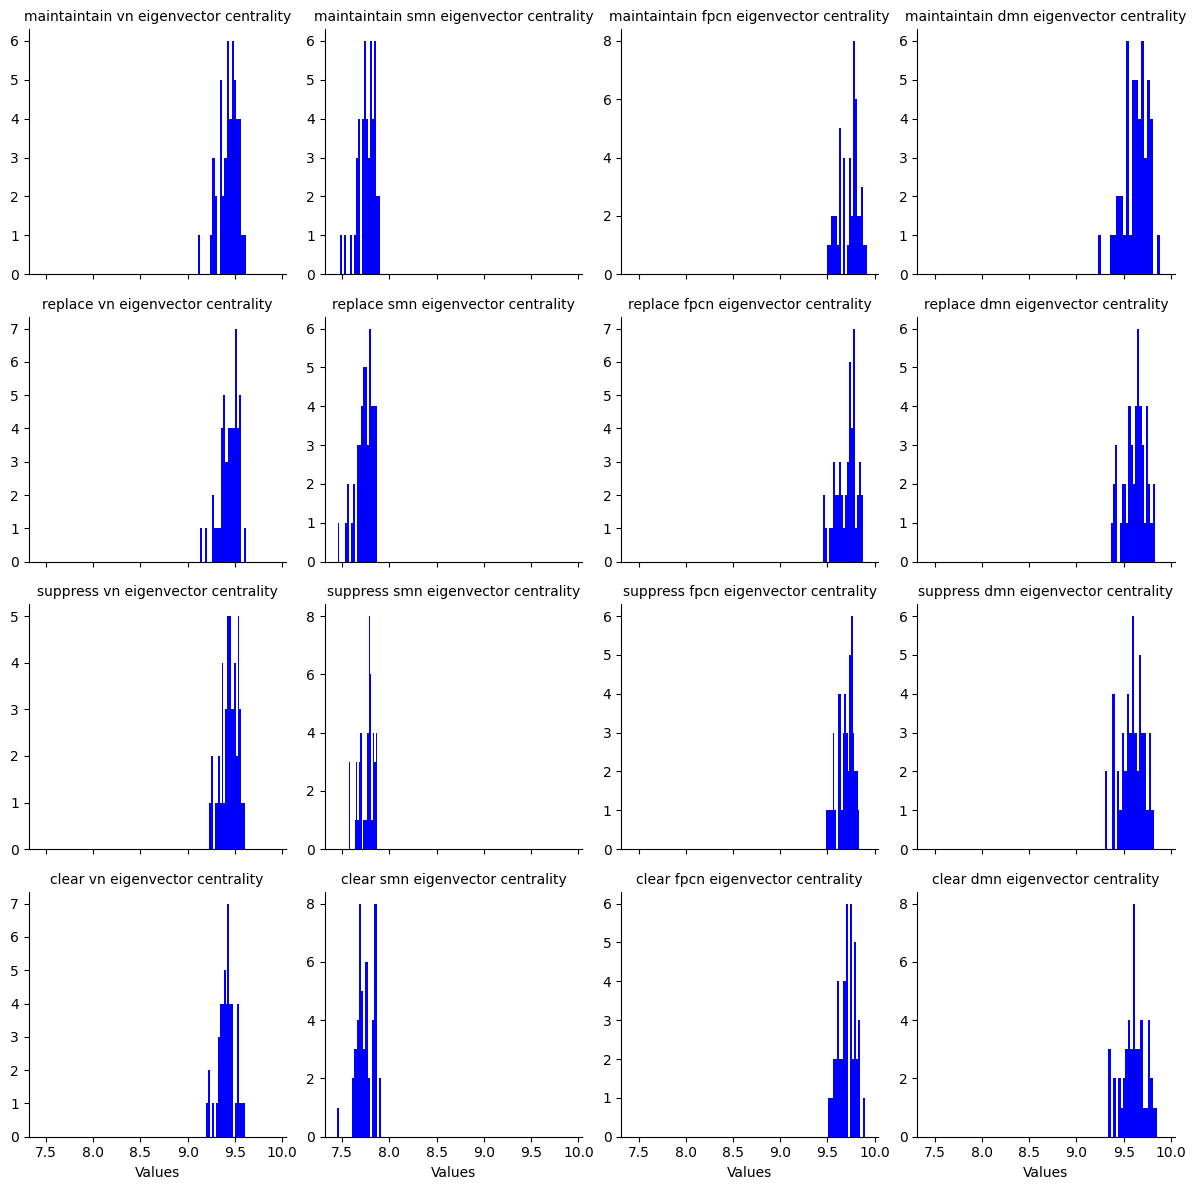

In [6]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

filtered_data = sub_data.filter(regex='eig')

# Melt the DataFrame to make it suitable for sns.FacetGrid
melted_data = filtered_data.melt(var_name='Columns', value_name='Values')
melted_data['Columns'] = (melted_data['Columns']
                          .str.replace("_md", " ", regex=False)
                          .str.replace("_", " ", regex=False)
                          .str.replace("main", "maintain", regex=False)
                         )

# Create a FacetGrid for each column with histograms
g = sns.FacetGrid(melted_data, col='Columns', col_wrap=4, sharex=True, sharey=False)
g.map(plt.hist, 'Values', bins=20, color='b')

# Iterate through each axis, set line color, and add horizontal line
for ax in g.axes:
    Columns = ax.get_title().replace("Columns = ", "")

g.set_titles(col_template="{col_name}")

plt.show()


In [7]:
import pandas as pd
from sklearn.preprocessing import power_transform

# Assuming sub_data is your DataFrame and filtered_data is already defined
# filtered_data = sub_data.filter(regex='disp')
# Filter columns based on regex
filtered_data = sub_data.filter(regex='eig')

# Apply Yeo-Johnson transformation
# Note: power_transform returns a numpy array, so we need to convert it back to a DataFrame
yeo_johnson_transformed_data = pd.DataFrame(power_transform(filtered_data, method='yeo-johnson'), columns=filtered_data.columns)

#yeo_johnson_transformed_data

import numpy as np
from scipy import stats

# Perform the Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(yeo_johnson_transformed_data)

print(f"Shapiro-Wilk Test statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

# Interpretation of the result
if shapiro_test.pvalue > 0.05:
    print("The data is likely normal (fail to reject H0)")
else:
    print("The data is likely not normal (reject H0)")


Shapiro-Wilk Test statistic: 0.9943341016769409, p-value: 0.0056843627244234085
The data is likely not normal (reject H0)


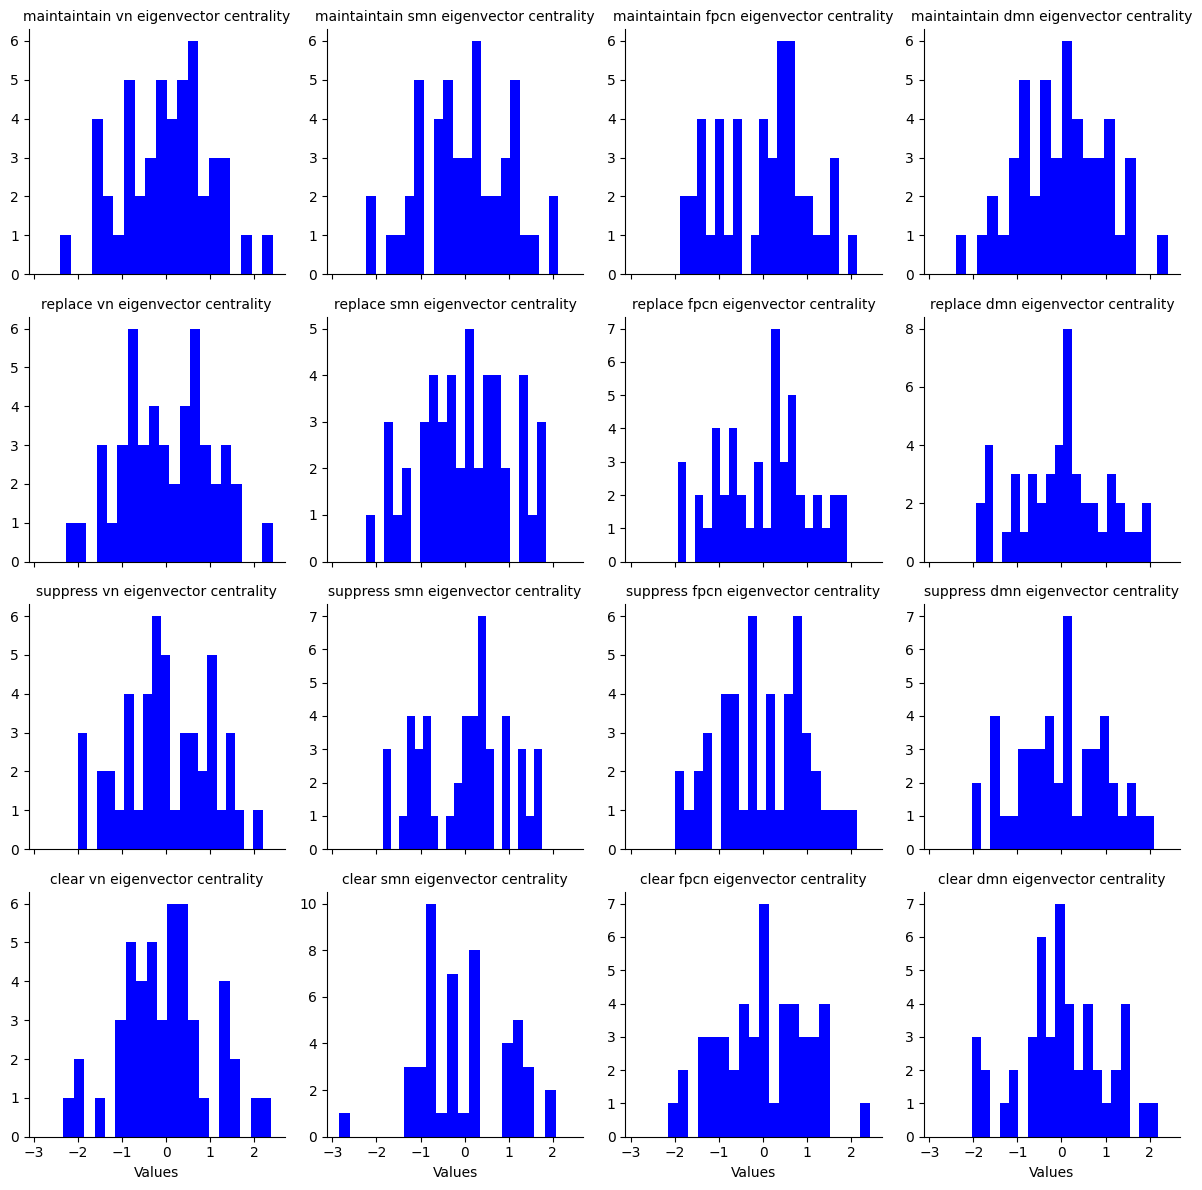

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Melt the DataFrame to make it suitable for sns.FacetGrid
melted_data = yeo_johnson_transformed_data.melt(var_name='Columns', value_name='Values')
melted_data['Columns'] = (melted_data['Columns']
                          .str.replace("_", " ", regex=False)
                          .str.replace("_", " ", regex=False)
                          .str.replace("main", "maintain", regex=False)
                         )

# Create a FacetGrid for each column with histograms
g = sns.FacetGrid(melted_data, col='Columns', col_wrap=4, sharex=True, sharey=False)
g.map(plt.hist, 'Values', bins=20, color='b')


# Iterate through each axis, set line color, and add horizontal line
for ax in g.axes:
    Columns = ax.get_title().replace("Columns = ", "")

g.set_titles(col_template="{col_name}")

plt.show()


In [28]:
def get_eig_means(data):

    disp_z = data.filter(regex='SubID|eig|RRS|total|z_ave')
    
    # Compute mean across the specified columns for each subject
    disp_z['vn_mean'] = disp_z[['maintain_vn_eigenvector_centrality', 'replace_vn_eigenvector_centrality', 'suppress_vn_eigenvector_centrality', 'clear_vn_eigenvector_centrality']].mean(axis=1)
    # Compute mean across the specified columns for each subject
    disp_z['smn_mean'] = disp_z[['maintain_smn_eigenvector_centrality', 'replace_smn_eigenvector_centrality', 'suppress_smn_eigenvector_centrality', 'clear_smn_eigenvector_centrality']].mean(axis=1)
    # Compute mean across the specified columns for each subject
    disp_z['fpcn_mean'] = disp_z[['maintain_fpcn_eigenvector_centrality', 'replace_fpcn_eigenvector_centrality', 'suppress_fpcn_eigenvector_centrality', 'clear_fpcn_eigenvector_centrality']].mean(axis=1)
    # Compute mean across the specified columns for each subject
    disp_z['dmn_mean'] = disp_z[['maintain_dmn_eigenvector_centrality', 'replace_dmn_eigenvector_centrality', 'suppress_dmn_eigenvector_centrality', 'clear_dmn_eigenvector_centrality']].mean(axis=1)
    # Compute mean across the specified columns for each subject
    disp_z['overall_mean'] = disp_z[['maintain_vn_eigenvector_centrality', 'replace_vn_eigenvector_centrality', 'suppress_vn_eigenvector_centrality', 'clear_vn_eigenvector_centrality', 'maintain_fpcn_eigenvector_centrality', 'replace_fpcn_eigenvector_centrality', 'suppress_fpcn_eigenvector_centrality', 'clear_fpcn_eigenvector_centrality', 'maintain_dmn_eigenvector_centrality', 'replace_dmn_eigenvector_centrality', 'suppress_dmn_eigenvector_centrality', 'clear_dmn_eigenvector_centrality']].mean(axis=1)

     # Compute mean across the specified columns for each subject
    disp_z['main_mean'] = disp_z[['maintain_vn_eigenvector_centrality', 'maintain_smn_eigenvector_centrality', 'maintain_fpcn_eigenvector_centrality', 'maintain_dmn_eigenvector_centrality']].mean(axis=1)
    disp_z['replace_mean'] = disp_z[['replace_vn_eigenvector_centrality', 'replace_smn_eigenvector_centrality', 'replace_fpcn_eigenvector_centrality', 'replace_dmn_eigenvector_centrality']].mean(axis=1)
    disp_z['suppress_mean'] = disp_z[['suppress_vn_eigenvector_centrality', 'suppress_smn_eigenvector_centrality', 'suppress_fpcn_eigenvector_centrality', 'suppress_dmn_eigenvector_centrality']].mean(axis=1)
    disp_z['clear_mean'] = disp_z[['clear_vn_eigenvector_centrality', 'clear_smn_eigenvector_centrality', 'clear_fpcn_eigenvector_centrality', 'clear_dmn_eigenvector_centrality']].mean(axis=1)

    return disp_z

In [29]:
sub_eig = get_eig_means(sub_data)

/projects/jade6100/software/anaconda/envs/jake/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/projects/jade6100/software/anaconda/envs/jake/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/projects/jade6100/software/anaconda/envs/jake/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [30]:
sub_data_yeo = pd.concat([sub_data.filter(regex=f'^(?!.*(disp|eig)).*$'), yeo_johnson_transformed_data], axis=1)
sub_eig_yeo = get_eig_means(sub_data_yeo)

In [31]:
def run_regression(data, target, y_vars):

    import pandas as pd
    import statsmodels.api as sm
    import statsmodels.formula.api as smf

    
         # Joining list elements with ' + '
    joined_vars = ' + '.join(y_vars)
    # Turning it into a list with a single string element
    new_y_vars = [joined_vars]

    formula = f'{target} ~ {new_y_vars}'
    formula = formula.replace("[", "").replace("]", "").replace("'", "")

    # Fit the regression model using the formula
    model = smf.ols(formula=formula, data=data).fit()

    # Print the full regression output
    summary = model.summary()

    var = pd.DataFrame(summary.tables[0].data).iloc[0,1]

    table1 = pd.DataFrame(summary.tables[0].data).iloc[2:4, 3:].T.assign(var = var)
    table1.columns = ['fstat', 'pval', 'var']
    table1 = table1[['var', 'fstat', 'pval']]

    table2_cols = pd.DataFrame(summary.tables[1].data).loc[0].to_list() + ['var']
    table2_cols[0] = 'parameter'
    table2 = pd.DataFrame(summary.tables[1].data).iloc[1:].assign(var = var)
    table2.columns = table2_cols
    table2 = table2[['var', 'parameter', 'coef', 'std err', 't', 'P>|t|']]


    df = pd.merge(table1, table2, how='outer', left_on='var', right_on='parameter')

    # Combine 'var_x' and 'var_y' into a new column 'var'
    df['var'] = df['var_x'].fillna(df['var_y'])

    # Drop the original 'var_x' and 'var_y' columns
    df.drop(columns=['var_x', 'var_y'], inplace=True)

    # Reorder columns to place 'var' at the front if desired
    cols = ['var'] + [col for col in df.columns if col != 'var']
    df = df[cols]
    df = df.assign(formula = formula)
    
    return df

In [32]:
def run_regression(data, target, y_vars):

    import pandas as pd
    import statsmodels.api as sm
    import statsmodels.formula.api as smf

    
         # Joining list elements with ' + '
    joined_vars = ' + '.join(y_vars)
    # Turning it into a list with a single string element
    new_y_vars = [joined_vars]

    formula = f'{target} ~ {new_y_vars}'
    formula = formula.replace("[", "").replace("]", "").replace("'", "")

    # Fit the regression model using the formula
    model = smf.ols(formula=formula, data=data).fit()

    # Print the full regression output
    summary = model.summary()

    var = pd.DataFrame(summary.tables[0].data).iloc[0,1]

    table1 = pd.DataFrame(summary.tables[0].data).iloc[2:4, 3:].T.assign(var = var)
    table1.columns = ['fstat', 'pval', 'var']
    table1 = table1[['var', 'fstat', 'pval']]

    table2_cols = pd.DataFrame(summary.tables[1].data).loc[0].to_list() + ['var']
    table2_cols[0] = 'parameter'
    table2 = pd.DataFrame(summary.tables[1].data).iloc[1:].assign(var = var)
    table2.columns = table2_cols
    table2 = table2[['var', 'parameter', 'coef', 'std err', 't', 'P>|t|']]


    df = pd.merge(table1, table2, how='outer', left_on='var', right_on='parameter')

    # Combine 'var_x' and 'var_y' into a new column 'var'
    df['var'] = df['var_x'].fillna(df['var_y'])

    # Drop the original 'var_x' and 'var_y' columns
    df.drop(columns=['var_x', 'var_y'], inplace=True)

    # Reorder columns to place 'var' at the front if desired
    cols = ['var'] + [col for col in df.columns if col != 'var']
    df = df[cols]
    df = df.assign(formula = formula)
    
    return df

def regression_function(data, variable_list):

    import itertools

    # Given list
    variables = variable_list
    targets = [['RRS_total'], ['PSWQ_total'], ['WBSI_total'], ['b_z_ave'], ['z_ave'], ['brd_z_ave']]

    # Create a list to hold all combinations
    all_combinations = []

    # Generate combinations for each length from 1 to the length of the list
    for r in range(1, len(variables) + 1):
        combinations = list(itertools.combinations(variables, r))
        all_combinations.extend(combinations)

    # Convert each tuple to a list
    list_combinations = [list(item) for item in all_combinations]

    regression_combinations = []
    for i in targets:
        for j in list_combinations:
            regression_combinations.append(run_regression(data, i, j))

    output_regressions = pd.concat(regression_combinations)

    # List of columns to convert
    columns_to_convert = ['fstat', 'pval', 'coef', 'std err', 't', 'P>|t|']

    # Convert each specified column to numeric, handling non-numeric values by converting them to NaN
    for column in columns_to_convert:
        output_regressions[column] = pd.to_numeric(output_regressions[column], errors='coerce')

    return output_regressions

In [35]:
eig_mean_list = ['vn_mean', 'smn_mean', 'fpcn_mean', 'dmn_mean', 'overall_mean']
#disp_pca_list = ['vn_pca', 'smn_pca', 'fpcn_pca', 'dmn_pca', 'overall_pca']

In [36]:
eig_mean_reg = regression_function(sub_eig, eig_mean_list).query('pval < .05')
eig_mean_reg.to_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/analysis/operation_regressions/eig_mean_reg.csv', index=False)

In [37]:
eig_mean_reg 

,var,fstat,pval,parameter,coef,std err,t,P>|t|,formula
0,RRS_total,5.270,0.0263,NaN,NaN,NaN,NaN,NaN,RRS_total ~ dmn_mean
0,RRS_total,4.869,0.0324,NaN,NaN,NaN,NaN,NaN,RRS_total ~ overall_mean
0,brd_z_ave,4.926,0.0314,NaN,NaN,NaN,NaN,NaN,brd_z_ave ~ dmn_mean
0,brd_z_ave,5.113,0.0285,NaN,NaN,NaN,NaN,NaN,brd_z_ave ~ overall_mean


In [38]:
eig_mean_reg_yeo = regression_function(sub_eig_yeo, eig_mean_list).query('pval < .05')
eig_mean_reg.to_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/analysis/operation_regressions/eig_mean_reg_yeo.csv', index=False)

In [39]:
eig_mean_reg_yeo

,var,fstat,pval,parameter,coef,std err,t,P>|t|,formula
0,RRS_total,5.305,0.0258,NaN,NaN,NaN,NaN,NaN,RRS_total ~ dmn_mean
0,RRS_total,4.947,0.0311,NaN,NaN,NaN,NaN,NaN,RRS_total ~ overall_mean
0,brd_z_ave,5.010,0.0301,NaN,NaN,NaN,NaN,NaN,brd_z_ave ~ dmn_mean
0,brd_z_ave,5.022,0.0299,NaN,NaN,NaN,NaN,NaN,brd_z_ave ~ overall_mean


In [41]:
eig_op_list = ['main_mean', 'replace_mean', 'suppress_mean', 'clear_mean']

In [42]:
eig_op_reg = regression_function(sub_eig, eig_op_list).query('pval < .05')

eig_mean_reg.to_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/analysis/operation_regressions/eig_op_reg.csv', index=False)

In [43]:
eig_op_reg

,var,fstat,pval,parameter,coef,std err,t,P>|t|,formula
0,RRS_total,4.319,0.04330,NaN,NaN,NaN,NaN,NaN,RRS_total ~ replace_mean
0,PSWQ_total,6.171,0.00428,NaN,NaN,NaN,NaN,NaN,PSWQ_total ~ main_mean + clear_mean
0,PSWQ_total,4.913,0.01180,NaN,NaN,NaN,NaN,NaN,PSWQ_total ~ replace_mean + clear_mean
0,PSWQ_total,4.245,0.01020,NaN,NaN,NaN,NaN,NaN,PSWQ_total ~ main_mean + replace_mean + clear_...
0,PSWQ_total,4.048,0.01260,NaN,NaN,NaN,NaN,NaN,PSWQ_total ~ main_mean + suppress_mean + clear...
0,PSWQ_total,3.224,0.03150,NaN,NaN,NaN,NaN,NaN,PSWQ_total ~ replace_mean + suppress_mean + cl...
0,PSWQ_total,3.114,0.02460,NaN,NaN,NaN,NaN,NaN,PSWQ_total ~ main_mean + replace_mean + suppre...
0,brd_z_ave,4.303,0.04370,NaN,NaN,NaN,NaN,NaN,brd_z_ave ~ main_mean
0,brd_z_ave,4.684,0.03570,NaN,NaN,NaN,NaN,NaN,brd_z_ave ~ replace_mean


In [44]:
eig_op_reg_yeo = regression_function(sub_eig_yeo, eig_op_list).query('pval < .05')

eig_op_reg_yeo.to_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/analysis/operation_regressions/eig_op_reg_yeo.csv', index=False)

In [45]:
eig_op_reg_yeo

,var,fstat,pval,parameter,coef,std err,t,P>|t|,formula
0,PSWQ_total,5.469,0.00748,NaN,NaN,NaN,NaN,NaN,PSWQ_total ~ main_mean + clear_mean
0,PSWQ_total,4.322,0.01920,NaN,NaN,NaN,NaN,NaN,PSWQ_total ~ replace_mean + clear_mean
0,PSWQ_total,3.781,0.01690,NaN,NaN,NaN,NaN,NaN,PSWQ_total ~ main_mean + replace_mean + clear_...
0,PSWQ_total,3.565,0.02150,NaN,NaN,NaN,NaN,NaN,PSWQ_total ~ main_mean + suppress_mean + clear...
0,PSWQ_total,2.902,0.04530,NaN,NaN,NaN,NaN,NaN,PSWQ_total ~ replace_mean + suppress_mean + cl...
0,PSWQ_total,2.816,0.03670,NaN,NaN,NaN,NaN,NaN,PSWQ_total ~ main_mean + replace_mean + suppre...


In [28]:
# List of items
disp_net_list = [
    'maintain_vn_eigenvector_centrality', 'maintain_smn_eigenvector_centrality',
    'maintain_fpcn_eigenvector_centrality', 'maintain_dmn_eigenvector_centrality',
    'replace_vn_eigenvector_centrality', 'replace_smn_eigenvector_centrality',
    'replace_fpcn_eigenvector_centrality', 'replace_dmn_eigenvector_centrality',
    'suppress_vn_eigenvector_centrality', 'suppress_smn_eigenvector_centrality',
    'suppress_fpcn_eigenvector_centrality', 'suppress_dmn_eigenvector_centrality',
    'clear_vn_eigenvector_centrality', 'clear_smn_eigenvector_centrality',
    'clear_fpcn_eigenvector_centrality', 'clear_dmn_eigenvector_centrality'
]

In [39]:
# List of items
disp_net_list = [
    'maintain_fpcn_eigenvector_centrality', 'maintain_dmn_eigenvector_centrality',
    'replace_fpcn_eigenvector_centrality', 'replace_dmn_eigenvector_centrality',
    'suppress_vn_eigenvector_centrality',
    'suppress_fpcn_eigenvector_centrality', 'suppress_dmn_eigenvector_centrality',
    'clear_fpcn_eigenvector_centrality', 'clear_dmn_eigenvector_centrality'
]

In [40]:
def run_regression(data, target, y_vars):

    import pandas as pd
    import statsmodels.api as sm
    import statsmodels.formula.api as smf

    
         # Joining list elements with ' + '
    joined_vars = ' + '.join(y_vars)
    # Turning it into a list with a single string element
    new_y_vars = [joined_vars]

    formula = f'{target} ~ {new_y_vars}'
    formula = formula.replace("[", "").replace("]", "").replace("'", "")

    # Fit the regression model using the formula
    model = smf.ols(formula=formula, data=data).fit()

    # Print the full regression output
    summary = model.summary()

    var = pd.DataFrame(summary.tables[0].data).iloc[0,1]

    table1 = pd.DataFrame(summary.tables[0].data).iloc[2:4, 3:].T.assign(var = var)
    table1.columns = ['fstat', 'pval', 'var']
    table1 = table1[['var', 'fstat', 'pval']]

    table2_cols = pd.DataFrame(summary.tables[1].data).loc[0].to_list() + ['var']
    table2_cols[0] = 'parameter'
    table2 = pd.DataFrame(summary.tables[1].data).iloc[1:].assign(var = var)
    table2.columns = table2_cols
    table2 = table2[['var', 'parameter', 'coef', 'std err', 't', 'P>|t|']]


    df = pd.merge(table1, table2, how='outer', left_on='var', right_on='parameter')

    # Combine 'var_x' and 'var_y' into a new column 'var'
    df['var'] = df['var_x'].fillna(df['var_y'])

    # Drop the original 'var_x' and 'var_y' columns
    df.drop(columns=['var_x', 'var_y'], inplace=True)

    # Reorder columns to place 'var' at the front if desired
    cols = ['var'] + [col for col in df.columns if col != 'var']
    df = df[cols]
    df = df.assign(formula = formula)
    
    return df

def regression_md_function(data, variable_list):

    import itertools

    # Given list
    variables = variable_list
    targets = [['RRS_total'], ['PSWQ_total'], ['WBSI_total'], ['b_z_ave'], ['z_ave'], ['brd_z_ave']]

    # Create a list to hold all combinations
    all_combinations = []

    # Generate combinations for each length from 1 to the length of the list
    for r in range(1, len(variables) + 1):
        combinations = list(itertools.combinations(variables, r))
        all_combinations.extend(combinations)

    # Convert each tuple to a list
    list_combinations = [list(item) for item in all_combinations]

    # Filter the list of lists to include only those with elements containing "DMN" or "FPCN"
    filtered_combinations = [sublist for sublist in list_combinations if any("dmn" in item or "fpcn" in item for item in sublist)]

    regression_combinations = []
    for i in targets:
        for j in filtered_combinations:
            regression_combinations.append(run_regression(data, i, j))

    output_regressions = pd.concat(regression_combinations)

    # List of columns to convert
    columns_to_convert = ['fstat', 'pval', 'coef', 'std err', 't', 'P>|t|']

    # Convert each specified column to numeric, handling non-numeric values by converting them to NaN
    for column in columns_to_convert:
        output_regressions[column] = pd.to_numeric(output_regressions[column], errors='coerce')

    return output_regressions

In [41]:
disp_net_reg = regression_function(sub_eig, disp_net_list).query('pval < .05')
disp_net_reg.to_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/analysis/operation_regressions/disp_net_reg.csv', index=False)  

In [42]:
disp_net_reg

,var,fstat,pval,parameter,coef,std err,t,P>|t|,formula
0,RRS_total,8.294,0.00602,NaN,NaN,NaN,NaN,NaN,RRS_total ~ main_dmn_dispersion_md
0,RRS_total,4.220,0.02090,NaN,NaN,NaN,NaN,NaN,RRS_total ~ main_fpcn_dispersion_md + main_dmn...
0,RRS_total,4.074,0.02360,NaN,NaN,NaN,NaN,NaN,RRS_total ~ main_dmn_dispersion_md + replace_f...
0,RRS_total,4.108,0.02300,NaN,NaN,NaN,NaN,NaN,RRS_total ~ main_dmn_dispersion_md + replace_d...
0,RRS_total,4.072,0.02370,NaN,NaN,NaN,NaN,NaN,RRS_total ~ main_dmn_dispersion_md + suppress_...
0,RRS_total,4.582,0.01540,NaN,NaN,NaN,NaN,NaN,RRS_total ~ main_dmn_dispersion_md + suppress_...
0,RRS_total,4.091,0.02330,NaN,NaN,NaN,NaN,NaN,RRS_total ~ main_dmn_dispersion_md + suppress_...
0,RRS_total,4.075,0.02360,NaN,NaN,NaN,NaN,NaN,RRS_total ~ main_dmn_dispersion_md + clear_fpc...
0,RRS_total,4.063,0.02390,NaN,NaN,NaN,NaN,NaN,RRS_total ~ main_dmn_dispersion_md + clear_dmn...
0,RRS_total,2.857,0.04770,NaN,NaN,NaN,NaN,NaN,RRS_total ~ main_fpcn_dispersion_md + main_dmn...


In [43]:
disp_net_reg_yeo = regression_function(sub_eig_yeo, disp_net_list).query('pval < .05')
disp_net_reg_yeo.to_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/analysis/operation_regressions/disp_net_reg_yeo.csv', index=False)

In [44]:
disp_net_reg_yeo 

,var,fstat,pval,parameter,coef,std err,t,P>|t|,formula
0,RRS_total,7.880,0.00731,NaN,NaN,NaN,NaN,NaN,RRS_total ~ main_dmn_dispersion_md
0,RRS_total,4.045,0.02420,NaN,NaN,NaN,NaN,NaN,RRS_total ~ main_fpcn_dispersion_md + main_dmn...
0,RRS_total,3.865,0.02820,NaN,NaN,NaN,NaN,NaN,RRS_total ~ main_dmn_dispersion_md + replace_f...
0,RRS_total,3.887,0.02770,NaN,NaN,NaN,NaN,NaN,RRS_total ~ main_dmn_dispersion_md + replace_d...
0,RRS_total,3.897,0.02750,NaN,NaN,NaN,NaN,NaN,RRS_total ~ main_dmn_dispersion_md + suppress_...
0,RRS_total,4.391,0.01810,NaN,NaN,NaN,NaN,NaN,RRS_total ~ main_dmn_dispersion_md + suppress_...
0,RRS_total,3.864,0.02830,NaN,NaN,NaN,NaN,NaN,RRS_total ~ main_dmn_dispersion_md + suppress_...
0,RRS_total,3.883,0.02780,NaN,NaN,NaN,NaN,NaN,RRS_total ~ main_dmn_dispersion_md + clear_fpc...
0,RRS_total,3.857,0.02840,NaN,NaN,NaN,NaN,NaN,RRS_total ~ main_dmn_dispersion_md + clear_dmn...
0,RRS_total,2.864,0.04740,NaN,NaN,NaN,NaN,NaN,RRS_total ~ main_fpcn_dispersion_md + main_dmn...


In [34]:
#!jupyter nbconvert --to script regressions.ipynb 

In [35]:
#sub_eig_yeo[['b_z_ave', ]]

In [36]:
def reg_plots(data, xvar, yvar, color, title, save=None): 

    import matplotlib.pyplot as plt
    import seaborn as sns
    import statsmodels.api as sm

    # Set the entire script to use Arial
    plt.rcParams['font.family'] = 'sans-serif'
  
    # Fit regression model
    X = sm.add_constant(data[f'{yvar}'])  # adding a constant
    model = sm.OLS(data[f'{xvar}'], X).fit()

    # Adjust figure size
    fig, ax = plt.subplots(figsize=(8, 6))  # Increased figure size

    # Scatter plot with regression line, ensuring CI is shown
    sns.set_theme(style="white")

    # Scatter plot with regression line modifications
    sns.regplot(x=f'{xvar}', y=f'{yvar}', data=data, ci=95,
                color=color, scatter_kws={'s': 40, 'alpha': 0.6}, truncate=False, ax=ax,
                line_kws={'linewidth': 2.5, 'alpha': 0.4})  # Set line width and transparency

    sns.regplot(x=f'{xvar}', y=f'{yvar}', data=data, fit_reg=False,
                color='white', scatter_kws={'s': 20, 'alpha': .5}, truncate=False, ax=ax)

    # Set axis labels
    ax.set_xlabel('Network Dispersion Score', fontsize=15)
    ax.set_ylabel('Thought Problems Score', fontsize=15)

    # Set title using text for precise control
    ax.text(.02, 1.05, title, transform=ax.transAxes, fontsize=15, fontweight='bold', verticalalignment='top')

    # Adding subtitle with F-statistic and p-value using text annotation, with 'p' in italic
    subtitle = f"F={model.fvalue:.3f}, "
    ax.text(.02, 1, subtitle, transform=ax.transAxes, fontsize=14, verticalalignment='top')
    ax.text(.02 + ax.transAxes.inverted().transform(ax.transData.transform((-1.12, 0)))[0], 1, "p", transform=ax.transAxes, fontsize=14, verticalalignment='top', style='italic')
    ax.text(.02 + ax.transAxes.inverted().transform(ax.transData.transform((-1.05, 0)))[0], 1, f"={model.f_pvalue:.4f}", transform=ax.transAxes, fontsize=14, verticalalignment='top')

    # Adjust tick parameters for both axes
    ax.tick_params(axis='both', labelsize=12)  # Increase tick label font size

    # Remove top and right borders
    sns.despine()

    # Manually adjust the subplot parameters
    plt.subplots_adjust(left=0.15, right=0.95, top=0.85, bottom=0.15)
    
    if save is not None:
        save_path = f'/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/analysis/operation_regressions/figures/{yvar}.png'
        plt.savefig(save_path, dpi=300)

    plt.show()


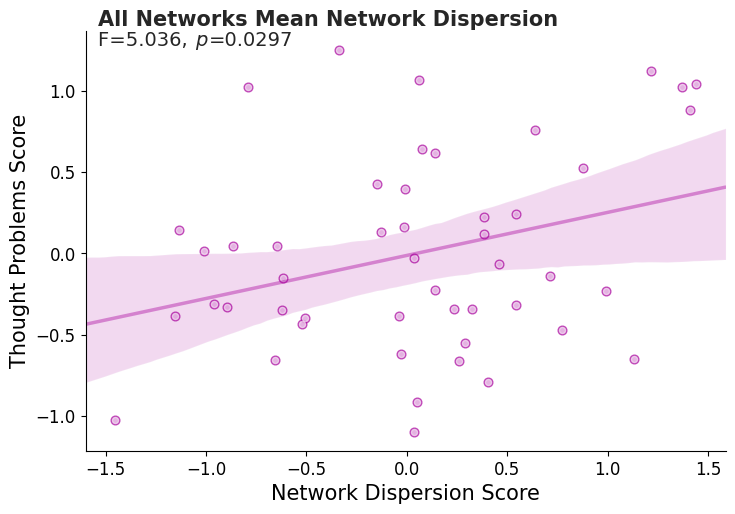

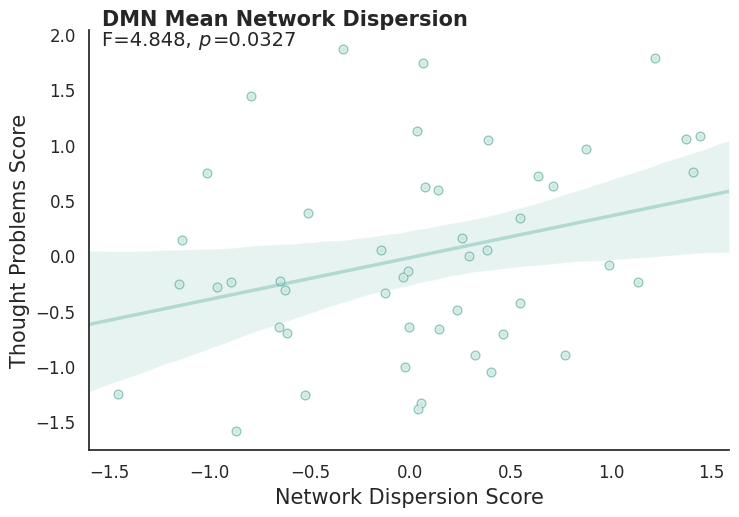

In [37]:
sub_eig_yeo_rev = sub_eig_yeo.copy()
# Filter columns that contain 'mean'
mean_columns = sub_eig_yeo_rev.filter(regex='mean').columns
# Multiply these columns by -1
sub_eig_yeo_rev[mean_columns] = sub_eig_yeo_rev[mean_columns] * -1

colors = ['#a8009d', '#64b3a3']
titles = ['All Networks Mean Network Dispersion', 'DMN Mean Network Dispersion']
yvars = ['overall_mean', 'dmn_mean']

for i,j,k in zip(yvars, colors, titles):
    reg_plots(data=sub_eig_yeo_rev, xvar='brd_z_ave', yvar=i, color=j,title=k, save=True)